# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

Este conjunto de datos describe los hongos en términos de sus características físicas. Se clasifican como venenosos o comestibles.

Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos de láminas en las familias Agaricus y Lepiota. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa. La guía establece claramente que no hay una regla simple para determinar la comestibilidad de un hongo. Con esa informacion:

    Siendo la clase positiva la indicación que el hongo es venenoso ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?

url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/mushroom.csv'

<10%>
Respuesta: Utilizaré un modelo clasificador, que pueda predecirme a partir de varias descripciones de muestras de hongos, cuales serán venenosos.
Al ser venenosa la clase positiva,debe ser muy selectivo al clasificar una muestra como venenosa es decir que solo debe clasificar una muestra como venenosa si está muy seguro de que lo es, minimizando así los falsos positivos.
Si le pido precision alto es que las instancias clasificadas como positivas sean verdaderamente positivas


### Obtención de datos
Importe las librerías a utilizar:

In [1]:
import pandas as pd

Importe los datos:

In [60]:
url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/mushroom.csv'
df = pd.read_csv(url)

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [61]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',b'e'
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


In [62]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [63]:
#No distingo cual es la columna que clasifica si con comestibles o venenosos por eso buscaré valores unicos.
uniqueValues = df.nunique()==2
print(uniqueValues)

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises%3F                   True
odor                        False
gill-attachment              True
gill-spacing                 True
gill-size                    True
gill-color                  False
stalk-shape                  True
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
class                        True
dtype: bool


In [64]:
# Los que dicen True significa que tienen dos valores unicos, es decir comestibles o no. Y analizando entre ellas, veo que es class.
df["class"]

0       b'p'
1       b'e'
2       b'e'
3       b'p'
4       b'e'
        ... 
8119    b'e'
8120    b'e'
8121    b'e'
8122    b'p'
8123    b'e'
Name: class, Length: 8124, dtype: object

In [65]:
#Conocer cuales son las columnas y el tipo de dato de cada una.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [66]:
#Veo si hay algun registro nan.
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [67]:
# Definimos variable objetivo, si es venenoso o no. Class == b'p' = 1, Class == b'e' = 0

# crea un diccionario que mapea los valores a reemplazar con sus correspondientes valores nuevos
reemplazos = {"b'p'": 1, "b'e'": 0}

# utiliza la función replace() para reemplazar los valores en la columna
df['class'] = df['class'].replace(reemplazos)

display(df)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',1
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',0
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',0
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',1
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',0
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',0
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',0
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',1


<5%> Separar X_train, y_train, X_test, y_test

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['class','veil-color','veil-type'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(X)
print(y)

     cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
0         b'x'        b's'      b'n'       b't'  b'p'            b'f'   
1         b'x'        b's'      b'y'       b't'  b'a'            b'f'   
2         b'b'        b's'      b'w'       b't'  b'l'            b'f'   
3         b'x'        b'y'      b'w'       b't'  b'p'            b'f'   
4         b'x'        b's'      b'g'       b'f'  b'n'            b'f'   
...        ...         ...       ...        ...   ...             ...   
8119      b'k'        b's'      b'n'       b'f'  b'n'            b'a'   
8120      b'x'        b's'      b'n'       b'f'  b'n'            b'a'   
8121      b'f'        b's'      b'n'       b'f'  b'n'            b'a'   
8122      b'k'        b'y'      b'n'       b'f'  b'y'            b'f'   
8123      b'x'        b's'      b'n'       b'f'  b'n'            b'a'   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            b'c'      b'n'       b'k'        b'e'       b

### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

**Transformación a aplicar:** 

- *Codificar variables categóricas*. Todas son variables categóricas por eso se aplica a __todas las columnas__ la transformacion de ___LabelEncoder___ que las convierte en variables numericas.

LabelEncoder se utiliza para transformar variables categóricas en valores numéricos enteros. 

Cada valor categórico único se asigna a un número entero único.No uso OneHotEncoder porque no hay muchas categorias dentro de cada columna y porque no hay peligro de que representen un orden intrinseco.

- *Escalar*. Utilizaré el ___StandardScaler___ ya que el modelo de regresion logistica no logra converger.
Es útil para datos con diferentes escalas, ya que algunas características pueden tener valores mucho más grandes que otras. La normalización asegura que todas las características contribuyan por igual al modelo.

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Codificar variables categóricas, columna por columna.
encoder = LabelEncoder()

X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Escalar utilizando pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler())])
    
# Entrenar el pipeline
pipeline.fit(X_train, y_test)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

### Selección de modelo y entrenamiento
 


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression(max_iter=10000)
cla_rf = RandomForestClassifier()

# Entrenamiento del modelo de regresión logística
cla_log.fit(X_train, y_train)

# Evaluación del modelo de regresión logística
score_log = cla_log.score(X_test, y_test)
print("Precisión del modelo de regresión logística:", score_log)

# Entrenamiento del modelo de Random Forest
cla_rf.fit(X_train, y_train)

# Evaluación del modelo de Random Forest
score_rf = cla_rf.score(X_test, y_test)
print("Precisión del modelo de Random Forest:", score_rf)

Precisión del modelo de regresión logística: 0.9421538461538461
Precisión del modelo de Random Forest: 1.0


<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

In [160]:
#Validacion cruzada por cada modelo
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Definir los modelos a evaluar
modelos = {'LogisticRegression': LogisticRegression(max_iter=10000), 
          'RandomForest': RandomForestClassifier()}

# Realizar la evaluación con validación cruzada y obtener las predicciones
y_scores = {}

for name, model in modelos.items():
    if name == 'LogisticRegression':
        y_scores[name] = cross_val_predict(model, X_train, y_train, cv=5, method='decision_function')
    else:
        y_scores[name] = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:,1]
        
# Calcular el área bajo la curva ROC para cada modelo
roc_auc_scores = {}
for name, y_score in y_scores.items():
    roc_auc_scores[name] = roc_auc_score(y_train, y_score)
# Imprimir el resultado
print(roc_auc_scores)

{'LogisticRegression': 0.9785775462371584, 'RandomForest': 1.0}


**Eleccion:** Viendo el score ROC con la validacion cruzada,utilizaré el modelo RandomForest.

El área bajo la curva ROC es una métrica comúnmente utilizada para evaluar la calidad de un modelo de clasificación binaria. 

La curva ROC representa la tasa de verdaderos positivos (sensibilidad) en función de la tasa de falsos positivos a medida que se varía el umbral de decisión del modelo. Cuanto mayor sea el AUC-ROC, mejor será el modelo para distinguir entre las clases positivas y negativas.

El AUC-ROC es una medida más completa de la calidad de un modelo en comparación con la simple precisión o exactitud. Esto se debe a que la precisión solo mide la capacidad del modelo para predecir correctamente los casos positivos, sin tener en cuenta la capacidad del modelo para predecir correctamente los casos negativos. Por lo tanto, un modelo puede tener una alta precisión o exactitud simplemente prediciendo todas las muestras como negativas, lo cual no es útil en muchos escenarios.

<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [86]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de parámetros a explorar
param_grid = [{
    'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

# Definir la métrica de evaluación
scoring = 'roc_auc'

# Definir el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=cla_rf, 
    param_grid=param_grid, 
    scoring=scoring,
    cv=5
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los resultados
best_score = grid_search.best_score_
best_params = grid_search.best_params_

El sentido de utilizar Grid Search es probar diferentes combinaciones de hiperparámetros para un modelo determinado y determinar cuál funciona mejor para un conjunto de datos específico. Una vez encontrados, estos permitiran mayor rendimiento del modelo.

In [97]:
print(best_score)
print(best_params)

1.0
{'max_features': 2, 'n_estimators': 30}


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

**1. Regresion Logistica**

In [165]:
# Crear region de validación
y_scores_log = cross_val_predict(cla_log, X_train, y_train, cv=5, method='decision_function')

val_log = (y_scores_log > 0)

In [166]:
# Metricas para la region de validación
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_train, val_log)
recall = recall_score(y_train, val_log)
precision = precision_score(y_train, val_log)
f1 = f1_score(y_train, val_log)
auc_roc = roc_auc_score(y_train,val_log)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9476815757078375
Recall: 0.9334186939820742
Precision: 0.9566929133858267
F1 score: 0.9449125081011017
AUC-ROC: 0.9471518598318115


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [164]:
# Métricas para la región de Test
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred_log = cla_log.predict(X_test)
y_proba_log = cla_log.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
auc_roc = roc_auc_score(y_test, y_proba_log)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9421538461538461
Recall: 0.9386189258312021
Precision: 0.941025641025641
F1 score: 0.939820742637644
AUC-ROC: 0.9779969236650253


**2. Random Forest** 

In [168]:
# Crear region de validación
y_scores_rf = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:,1]

val_rf = (y_scores_rf > 0.5)

In [169]:
# Metricas para la region de validación
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_train, val_rf)
recall = recall_score(y_train, val_rf)
precision = precision_score(y_train, val_rf)
f1 = f1_score(y_train, val_rf)
auc_roc = roc_auc_score(y_train,val_rf)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0
AUC-ROC: 1.0


In [170]:
# Métricas para la región de Test
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred_rf = cla_rf.predict(X_test)
y_proba_rf = cla_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_proba_rf)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0
AUC-ROC: 1.0


Los valores obtenidos en ambos modelos, son similares, es un buen indicador de que el modelo tiene un buen rendimiento y generaliza bien a datos nuevos. A veces, si hay gran diferencia entre los valores obtenidos en el conjunto de prueba y el conjunto de validación, puede ser indicador de un problema de sobreajuste o subajuste, donde el modelo se está ajustando demasiado a los datos de entrenamiento o no está siendo lo suficientemente complejo como para capturar los patrones en los datos.

En el caso del modelo de regresión logistica vemos que hay una leve diferencia, eso tambien nos da seguridad de que existe una diferencia entre la region de validacion y la region de test. Por lo tanto sabemos que tiene sentido crear una region de validación ya que no es lo mismo y que ademas, está bien hecho.

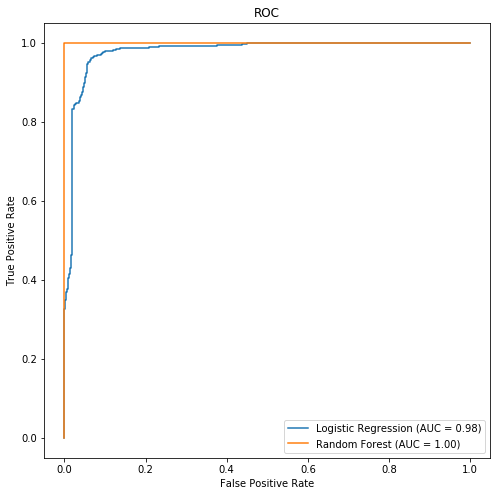

In [156]:
# Grafico de ROC para ambos modelos, y poder percibir el area bajo la curva.
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(cla_log, X_test, y_test, name='Logistic Regression', ax=ax)
plot_roc_curve(cla_rf, X_test, y_test, name='Random Forest', ax=ax)
ax.set_title('ROC')
ax.legend()
plt.show()